## Unsupervised algorithms for clustering data
This element will mainly focus on the limitations and capabilities of clustering algorithms.
### Here:
- k-means
- spectral clustering
- elbow method to determine hyperparameters


In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt

from unsupervised.funcs_spectral_clustering import full_kmeans
from sklearn.cluster import SpectralClustering

from unsupervised.funcs_elbowing import get_clusters_tightness_for_ks


Consider the following data set


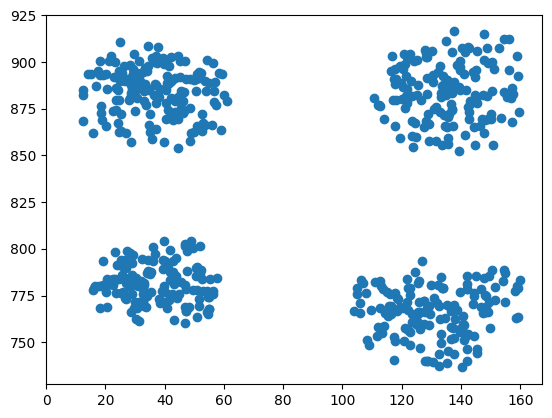

In [2]:
# Import data
data1 = pd.read_csv("data_kmeans.csv")
data1_np = pd.DataFrame.to_numpy(data1)

# Quick glance over the data
f, ax = plt.subplots(1)
ax.scatter(data1_np[:,0], data1_np[:,1])

# setting a limit to avoid a visual stretch of data
ax.set_xlim(xmin=0)

plt.show(f)


With a plot like this it is easy for a human to see that there are 4 chunks of data. However, all that a computer "sees" when dealing with a dataset looks something like:

In [ ]:
print(data1.iloc[:10,:2])

### One way a computer may split data is a k-means algorithm

k-means is an unsupervised ML algorithm for clustering. It's used to split data into multiple groups if there's no other information about the data given.

The algorithm iteratively picks centers for given number of clusters, groups data by the distance from the centers, and again, finds centers of the new clusters, over and over, for a limited number of iterations, or until the centers remain the same.

Given the repeated nature of the algorithm it isn't very efficient as it compiles distance for whole dataset on every iteration.

Setting 4 as number of clusters, apply k-means.

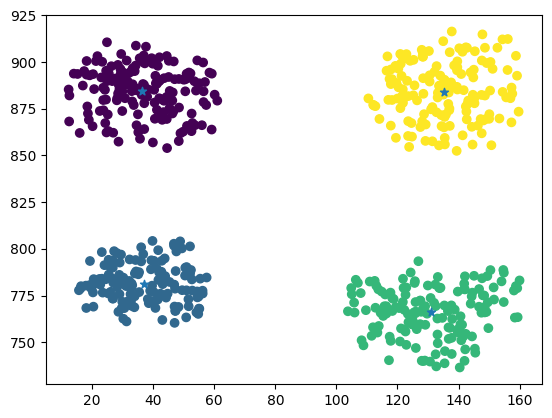

In [4]:
labels, centers = full_kmeans(data1_np, 4)
plt.scatter(data1_np[:, 0], data1_np[:, 1], c=labels)
plt.scatter(centers[:, 0], centers[:, 1], marker="*")

With data like this, it is easy to tell how many clusters there potentially should be. However, in real life, data rarely looks like this. The number of potential batches that data may be split into is not always so obvious.


Consider the next example:

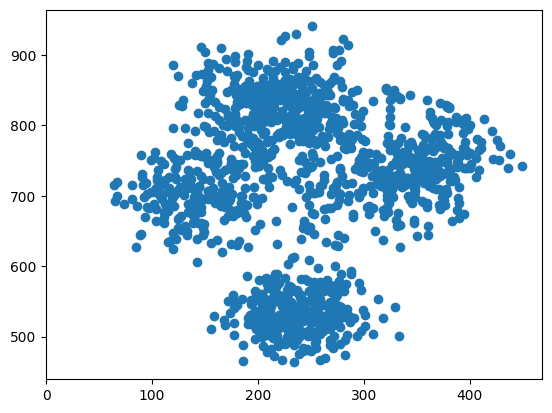

In [5]:
# Import data
data2 = pd.read_csv("data_elbow.csv")
data2_np = pd.DataFrame.to_numpy(data2)[:,:2]

# Quick glance over the data
f, ax = plt.subplots(1)
ax.scatter(data2_np[:,0], data2_np[:,1])
ax.set_xlim(xmin=0)
plt.show(f)

Since k-means takes in a number of clusters as a hyperparameter, we need to determine it before we apply the algorithm. How to tell how many clusters there should be?
One of the ways to do so is the elbow method.

## Elbowing?
Plot the values of k against your chosen measure of cluster "goodness" as a line plot with each point marked clearly.
Examining your plot, find the value of k that is closest to the "elbow"; that is where the plot changes directions most sharply. This point should look like the elbow on a bent arm.

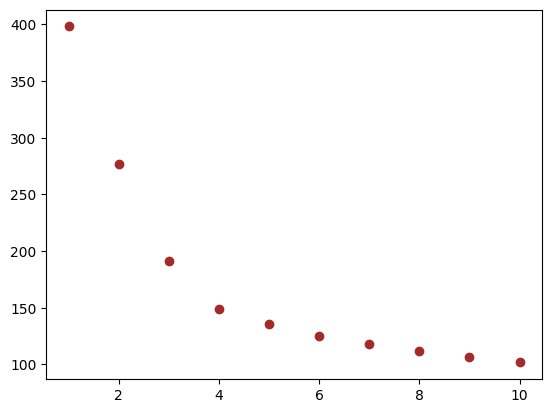

In [6]:
# See commented code in elbowing.py for the explanation of how to get this plot
data_elbow = get_clusters_tightness_for_ks(data2_np, [*range(1,11)])
plt.scatter([*range(1,11)], data_elbow, c='brown')


After plotting the values of k against the measure of cluster tightness, the value, that's closest to the "elbow", where the graph changes the slope most sharply.
It's called an elbow method, because the best number of clusters is at a point that looks like the elbow on a bent arm.

For the current graph, the best number of clusters is around 4.


Apply kmeans, using 4 as a hyperparameter

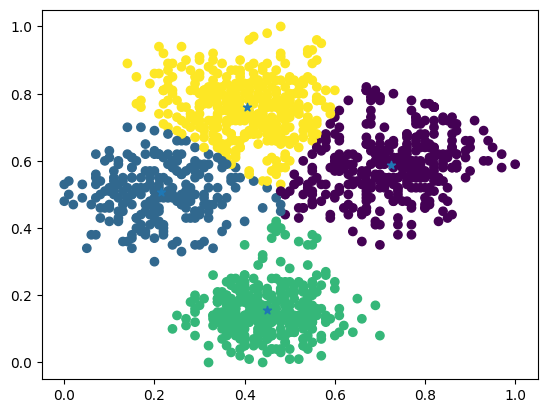

In [8]:
labels, centers = full_kmeans(data2_np, 4)
plt.scatter(data2_np[:, 0], data2_np[:, 1], c=labels)
plt.scatter(centers[:, 0], centers[:, 1], marker="*")

Yay!

Now, consider the following dataset:

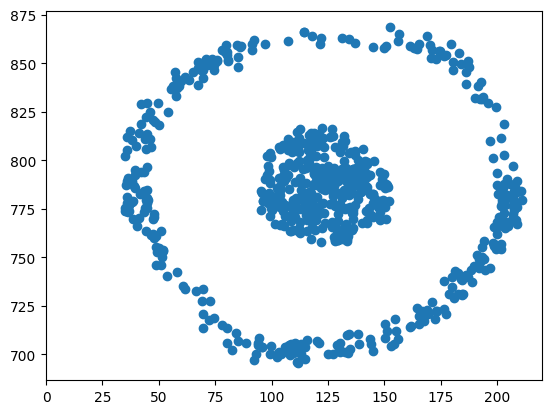

In [9]:
# Import data 3
data3 = pd.read_csv("data_spectral.csv")
data3_np = pd.DataFrame.to_numpy(data3)
# data_np = get_data(data)

# Quick glance over the data
f, ax = plt.subplots(1)
ax.scatter(data3_np[:,0], data3_np[:,1])
ax.set_xlim(xmin=0)
plt.show(f)


With a glimpse of an eye, a human can determine that there are 2 blobs of data: internal and external.

In [10]:
labels, centers = full_kmeans(data3_np, 2)

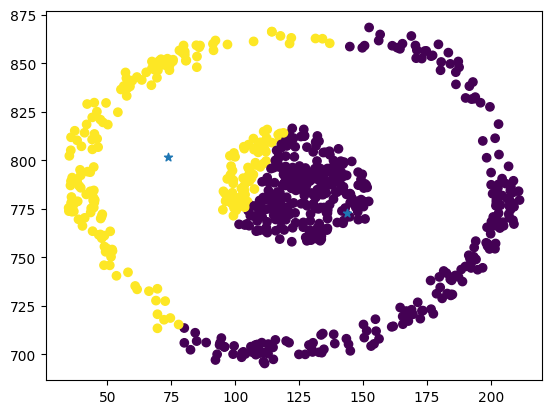

In [11]:
plt.scatter(data3_np[:,0], data3_np[:,1], c=labels)
plt.scatter(centers[:,0], centers[:,1], marker="*")

However, here, k-means fail to "see" the same thing.
The way that k-means divide data, expects to be able to split data by multiple lines.

## Spectral clustering
Something that kmeans can't do is split data if given data that here we can't just put a line beyond which it can be splitted.

See the _spectral_clustering.py_ for step-by-step explanation of the process.
Here I will use the off-shelf implementation of Spectral clustering from sklearn.

In [13]:
clustering = SpectralClustering(n_clusters=2,
        eigen_solver="arpack",
        affinity="nearest_neighbors",
        random_state=6).fit(data3_np)
labels = clustering.labels_

/usr/local/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


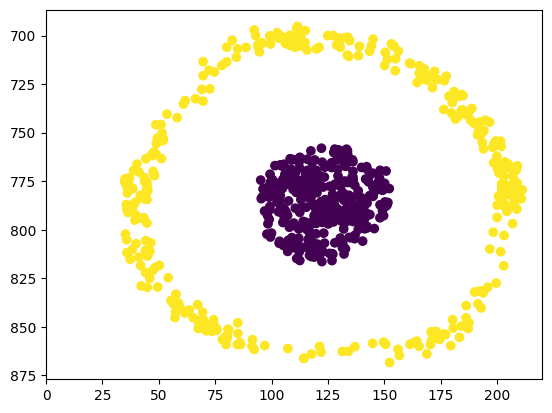

In [14]:
# See the spectral clustering:
f, ax = plt.subplots(1)
ax.scatter(data3_np[:,0], data3_np[:,1], c = labels)
ax.set_xlim(xmin=0)
plt.gca().invert_yaxis()
plt.show(f)


Additionally, spectral clustering can be used in the same way as the kmeans

Use spectral clustering to separate our initial data 1:

In [119]:
clustering = SpectralClustering(n_clusters=4,
        eigen_solver="arpack",
        affinity="nearest_neighbors",
        random_state=6).fit(data1_np)
labels = clustering.labels_


/usr/local/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


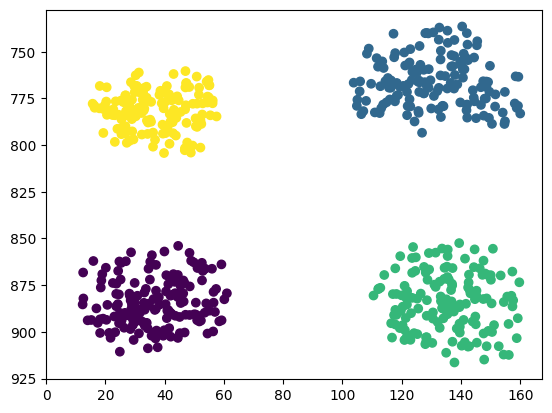

In [120]:
f, ax = plt.subplots(1)
ax.scatter(data1_np[:,0], data1_np[:,1], c = labels)
ax.set_xlim(xmin=0)
plt.gca().invert_yaxis()
plt.show(f)


To sum this up, k-means is a nice method to split datapoints if there are some similarities between them -- in tasks like segmentation.
However, it is also limited due to its simplicity. It can be used for simple classification, but about this -- later.

It requires additional hyperparameters, but there is a way to figure them out using the elbow method, which isn't the only way to determine it.
[1] https://towardsdatascience.com/elbow-method-is-not-sufficient-to-find-best-k-in-k-means-clustering-fc820da0631d

Spectral clustering can do the job that k-means do, and take it further, due to its complexity and depth in which it explores data. Can be used for market research, pattern recognition, data analysis, and image processing.
[2] https://www.math.umd.edu/~rvbalan/TEACHING/AMSC663Fall2015/PROJECTS/P2/AMSC663664%20Final%20ReportDanielleMiddlebrooks.pdf